disclaimer: To ensure that the notebook can be run from (more or less) any point, I try to load the relevant functions or modules whenever I use them in a cell. This is generally not good practice as it adds unneccesary overhead

# 0.  Image representation as numerical arrays
### We start by importing numpy and creating and printing a simple 9x9 checkerboard array


In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload
import numpy as np

checkBoard = np.zeros((9,9))
checkBoard[0::2, 1::2] = 1
checkBoard[1::2, 0::2] = 1

print(checkBoard)

[[0. 1. 0. 1. 0. 1. 0. 1. 0.]
 [1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0. 1. 0. 1. 0.]
 [1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0. 1. 0. 1. 0.]
 [1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0. 1. 0. 1. 0.]
 [1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0. 1. 0. 1. 0.]]


### Then, we import [pyplot](https://matplotlib.org/api/pyplot_api.html) and [image](https://matplotlib.org/api/image_api.html) modules from the ploting library [matplotlib](https://matplotlib.org/3.1.1/api/index.html). Using it, we can display our checkerboard array in image form:

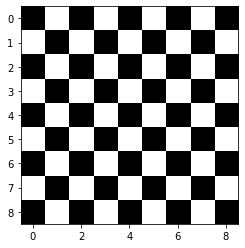

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.imshow(checkBoard, cmap='gray', interpolation='nearest') 
plt.show()

### As another simple example, we will import the [data](https://scikit-image.org/docs/dev/api/skimage.data.html) module image processing library [scikit-image](https://scikit-image.org/) and load a small image of a bush. 

#### First, we want to print the pixel values:

In [3]:
from skimage import data
image_of_a_bush = data.lfw_subset()
image_of_a_bush = image_of_a_bush[0,:,:]

#print the #of dimentions, the shape, and the pixel values of the image
print("The number of dimensions of the image is: ", image_of_a_bush.ndim)
print("The size of the image is: ", image_of_a_bush.shape)
print(image_of_a_bush)

The number of dimensions of the image is:  2
The size of the image is:  (25, 25)
[[0.28888887 0.32941177 0.38039216 0.50326794 0.47973856 0.50457519
  0.55947715 0.54901963 0.56732029 0.57516342 0.59738559 0.61307186
  0.59607846 0.56078434 0.54248363 0.49281046 0.45359477 0.44183007
  0.2522876  0.23529412 0.4261438  0.49673203 0.72418302 0.69934636
  0.43529412]
 [0.29411766 0.33333334 0.44052288 0.52026147 0.49934641 0.53464049
  0.55424833 0.59869283 0.6156863  0.61960787 0.620915   0.63660127
  0.62875813 0.6326797  0.59215689 0.52418303 0.47581699 0.44705883
  0.34640524 0.32287583 0.33202612 0.59738559 0.81830066 0.77777773
  0.27843139]
 [0.35294119 0.41568628 0.42745098 0.48104575 0.50457519 0.52287579
  0.53594774 0.63529414 0.65359479 0.620915   0.61830068 0.64444441
  0.61830068 0.61830068 0.60000002 0.53856206 0.46405229 0.43137255
  0.37254903 0.37908494 0.29411766 0.50065356 0.60915029 0.53856206
  0.36732024]
 [0.41176471 0.43006536 0.49542484 0.48627451 0.50980395 0.52

### Can you see the bush? 

#### Next, show the image:

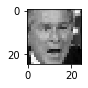

In [4]:
plt.figure(figsize=(1,1))
plt.imshow(image_of_a_bush, cmap='gray', interpolation='nearest') 
plt.show()

# 1. Pixel-level operations 
### Now that we have a sense of what a digital image is, let's start manipulating it. We'll begin with simple pixel-level operations

## 1.1 Basic pixel-level operations
### Let's look at a more interesting image. From scikit-image data we'll open a example IHC image, and plot it using pyplot.

The number of dimensions of the image is:  3
The size of the image is:  (512, 512, 3)


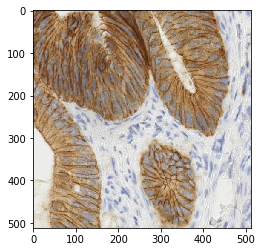

In [5]:
from skimage import data
import matplotlib.pyplot as plt
import numpy as np

image_hist = data.immunohistochemistry()
#check the size of the image
print("The number of dimensions of the image is: ", image_hist.ndim)
print("The size of the image is: ", image_hist.shape)
plt.imshow(image_hist, cmap=plt.cm.gray)

### Seems like we have an RGB image. Let's look at every channel independently.

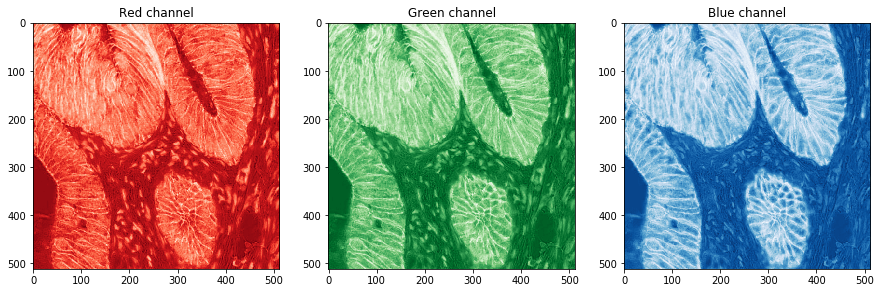

In [6]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.gca().set_title('Red channel')
plt.imshow(image_hist[:,:,0], cmap='Reds', interpolation='nearest')
plt.subplot(132)
plt.gca().set_title('Green channel')
plt.imshow(image_hist[:,:,1], cmap='Greens', interpolation='nearest')
plt.subplot(133)
plt.gca().set_title('Blue channel')
plt.imshow(image_hist[:,:,2], cmap='Blues', interpolation='nearest')

plt.show()

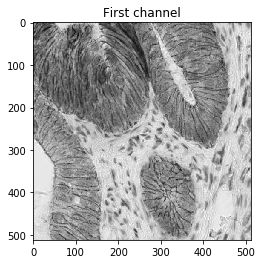

In [7]:
#for the moment let's look at only the first color channel
image_hist = image_hist[:,:,0]
plt.gca().set_title('First channel')
plt.imshow(image_hist, cmap=plt.cm.gray)


### We can invert the image using the *invert* function from [scikit-images utilities module](https://scikit-image.org/docs/dev/api/skimage.util.html):

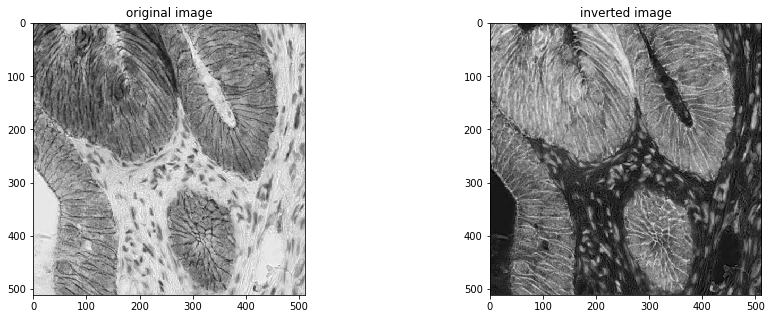

In [8]:
from skimage.util import invert

inverted_image = invert(image_hist)

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.gca().set_title('original image')
plt.imshow(image_hist, cmap=plt.cm.gray)
plt.subplot(122)
plt.gca().set_title('inverted image')
plt.imshow(inverted_image, cmap=plt.cm.gray)


### Let's try some other pixel-level operations. We'll use the [Exposure module](https://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.adjust_sigmoid) from scikit image.

1. A gamma correction applies the nonlinear transform $V_{out} = V_{in}^\gamma$.

2. A log transform applies $V_{out} = log(V_{in}+1)$.

3. A sigmoid transform applies $V_{out} = \frac{1}{1+e^{gain\cdot(\text{cutoff}-V_{in})}}$.

4. Equalization transforms the intensity histogram of an image to a uniform distribution. It often enhances the contrast of the image

5. CLAHE works similarly to equalization thats applied separately to different regions of the image.

Try to apply these by calling the relevant function from skimage.exposure, or by direct calculation. 

Play with the different parameters and see how they change the output.

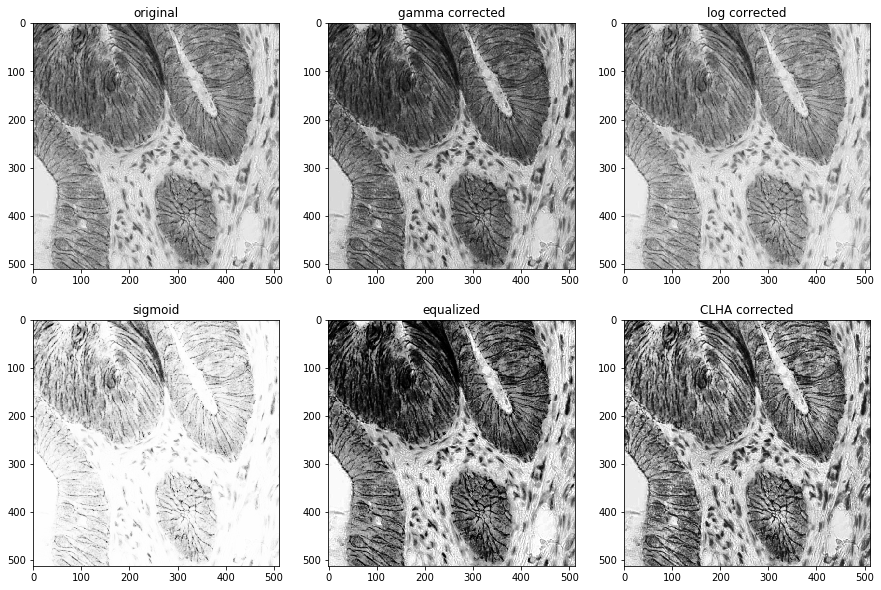

In [9]:
from skimage import exposure

# apply gamma scaling with gamma=2
gamma=2
gamma_corrected = exposure.adjust_gamma(image_hist, gamma)

# apply logarithmic scaling
logarithmic_corrected = exposure.adjust_log(image_hist)

# apply sigmoidal scaling with cutoff=0.4
cutoff = 0.4
sigmoid_corrected = exposure.adjust_sigmoid(image_hist, cutoff=cutoff)

# equalize
equalize_corrected = exposure.equalize_hist(image_hist)

# apply Contrast Limited Adaptive Histogram Equalization (CLAHE)
CLHA_corrected = exposure.equalize_adapthist(image_hist)

plt.figure(figsize=(15,10))

plt.subplot(231)
plt.gca().set_title('original')
plt.imshow(image_hist, cmap=plt.cm.gray)

plt.subplot(232)
plt.gca().set_title('gamma corrected')
plt.imshow(gamma_corrected, cmap=plt.cm.gray)

plt.subplot(233)
plt.gca().set_title('log corrected')
plt.imshow(logarithmic_corrected, cmap=plt.cm.gray)

plt.subplot(234)
plt.gca().set_title('sigmoid')
plt.imshow(sigmoid_corrected, cmap=plt.cm.gray)

plt.subplot(235)
plt.gca().set_title('equalized')
plt.imshow(equalize_corrected, cmap=plt.cm.gray)

plt.subplot(236)
plt.gca().set_title('CLHA corrected')
plt.imshow(CLHA_corrected, cmap=plt.cm.gray)

## 1.2 Image filtering

### Spatial filtering is an image processing technique for changing the intensities of a pixel according to the intensities of some neighborhood of pixels. 

### The *Kernel* of the filter defines the neighborhood and the weights asigned to each pixel in the neighborhood:

<img src="./images/spatialFilter.jpg" width="400" height="200" >
This procedure is formally a convolution and is marked by an asterisk: $I_o = I_i\ast f$. 

*side note: since a convolution in the spatial domain is equivalent to multiplication in the frequency domain. Sometimes it is more computationally reasonable to calculate these in fourier space.*

*side side note: filtering can also be performed in the frequency domain by directly removing a set of frequencies from an image.*


### The kernel can be of any shape/size, it is applied to each pixel in the image, and the output is a new, filtered, image. The output image is often called the *response* to the given filter.
Example, local average: <img src="./images/spatialFilterExample.jpg" width="300" height="150">


#### Filtering is an incredibly versatile tool with which you can emphasize certain features or remove other features. 
#### Image processing operations implemented with filtering include smoothing, sharpening, and edge enhancement.


### To implement different image filters, we will use the [filters module from scikit-image](https://scikit-image.org/docs/dev/api/skimage.filters.html)

### 1.2.1 Smoothing

#### Smoothing, aka low-pass filtering, is used for removing high-frequency noise from images. Most commonly, a gaussian kernel is used, but others (e.g. local mean/median) work too. We'll see the effect of gaussian filtering.

Try to change the value of sigma (width of the gaussian) to see how the output changes.

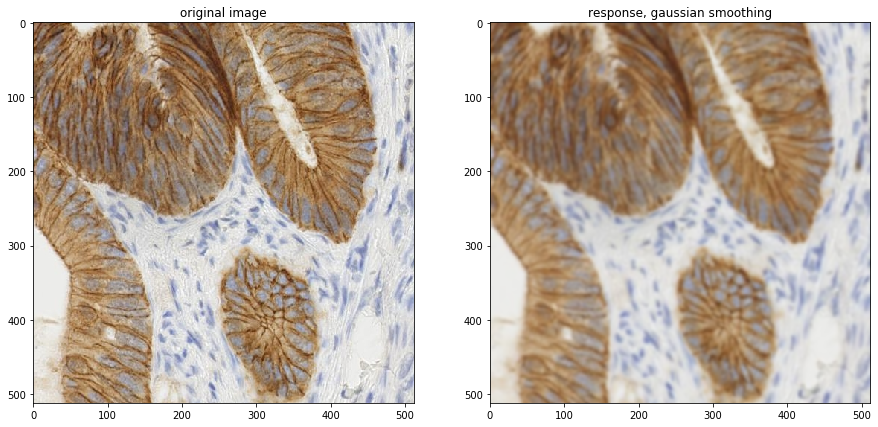

In [10]:
import matplotlib.pyplot as plt
import numpy as np

from skimage import filters

image_hist = data.immunohistochemistry()

sigma = 2

gauss_filtered_img = filters.gaussian(image_hist, sigma=sigma, multichannel=True)

plt.figure(figsize=(15,8))
plt.subplot(121)
plt.gca().set_title('original image')
plt.imshow(image_hist, cmap=plt.cm.gray)
plt.subplot(122)
plt.gca().set_title('response, gaussian smoothing')
plt.imshow(gauss_filtered_img, cmap=plt.cm.gray)



### 1.2.2 Sharpening

#### sharpening is sometimes used to enhance a blurry (i.e. crappy) image. 


1. Start with input image
2. Apply gaussian filter with very narrow kernel
3. Subtract filtered image from input image to get only high frequency components
3. Amplify (alpha) and add high frequency components to original input image 


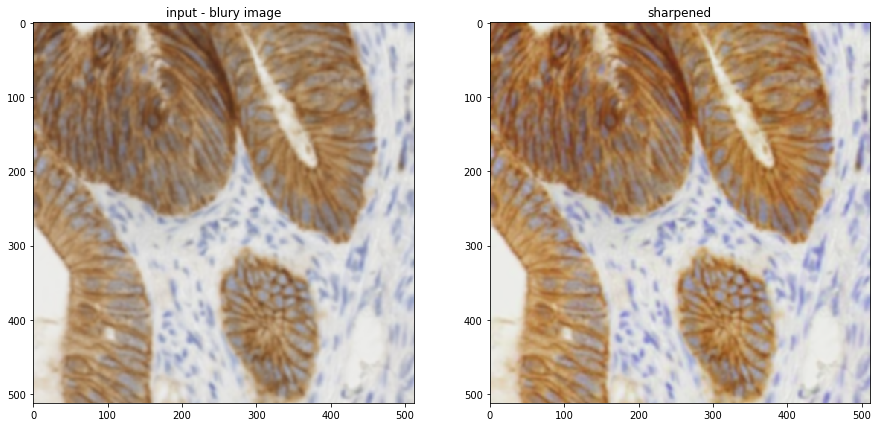

In [11]:
filter_blurred_f = filters.gaussian(gauss_filtered_img, sigma=0.5, multichannel=False)
alpha = 3
sharpened = gauss_filtered_img + alpha * (gauss_filtered_img - filter_blurred_f)


plt.figure(figsize=(15,8))
plt.subplot(121)
plt.gca().set_title('input - blury image')
plt.imshow(gauss_filtered_img, cmap=plt.cm.gray)
plt.subplot(122)
plt.gca().set_title('sharpened')
plt.imshow(sharpened, cmap=plt.cm.gray)


### 1.2.3 Edge enhancement

#### Edge detecting filters work by measuring the local spatial gradient of an image. Common types are the Sobel, Prewitt and Roberts. 

#### The filters are usually applied to each direction individually and then the total magnitude of the gradient is calculated.
$G = \sqrt{G_x^2+G_y^2}$

#### Sobel: 
<img src="./images/sobmasks.gif" width="200" height="100" align="left">

<br><br><br><br>

#### Prewitt: 
<img src="./images/premasks.png" width="200" height="100" align="left">

<br><br><br><br>

#### Roberts: 
<img src="./images/robmasks.gif" width="200" height="100" align="left">



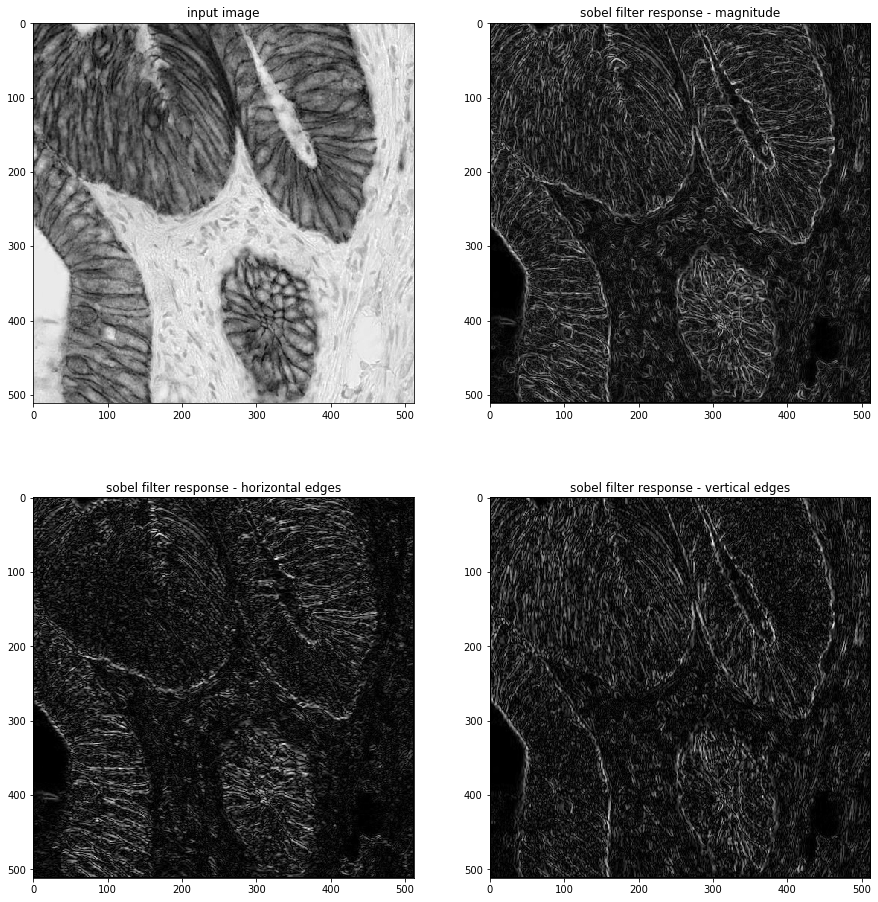

In [12]:
# sobel magnitude
filtered_img = filters.sobel(image_hist[:,:,2])
# sobel horizontal
filtered_img_h = filters.sobel_h(image_hist[:,:,2])
# sobel vertical
filtered_img_v = filters.sobel_v(image_hist[:,:,2])

plt.figure(figsize=(15,16))
plt.subplot(221)
plt.gca().set_title('input image')
plt.imshow(image_hist[:,:,2], cmap=plt.cm.gray)
plt.subplot(222)
plt.gca().set_title('sobel filter response - magnitude')
plt.imshow(filtered_img, cmap=plt.cm.gray)
plt.subplot(223)
plt.gca().set_title('sobel filter response - horizontal edges')
plt.imshow(np.abs(filtered_img_h), cmap=plt.cm.gray)
plt.subplot(224)
plt.gca().set_title('sobel filter response - vertical edges')
plt.imshow(np.abs(filtered_img_v), cmap=plt.cm.gray)

## 1.3 Masking

### A mask is a binary image (0s and 1s) that typically separates a given input image into Foreground (interesting) and Background (boring) regions, or for picking a region-of-interest (ROI). A mask is *applied* to an image by element-wise multiplication. The size of a mask must be *identical* to the size of the image it's applied to.


### Let's begin by creating a simple circular mask. We'll create an array where the value at each point is it's distance from the center of the image, and display it as an image:

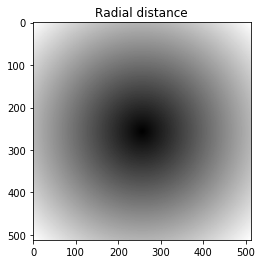

In [13]:
import matplotlib.pyplot as plt
import numpy as np

#dimensions in x and y
y = 512
x = 512

#position of center
centY = np.ceil(y/2)
centX = np.ceil(x/2)

#create the grid
yy,xx = np.indices((y,x))

#create radial distance map
radialDist = np.sqrt((xx-centX)**2 + (yy - centY)**2)

#display
plt.gca().set_title('Radial distance')
plt.imshow(radialDist, cmap='gray', interpolation='nearest')
plt.show()

### Of these points, we'll pick a circle of radius 100 and display it as an image:

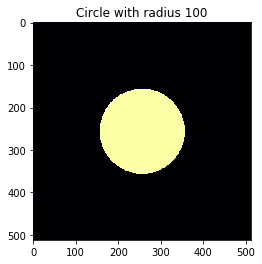

In [14]:
circ1 = radialDist < 100

plt.show()
plt.gca().set_title('Circle with radius 100')
plt.imshow(circ1, cmap='inferno', interpolation='nearest')

#### This object is a **mask**. If you multiply this matrix of 0s and 1s with an image of the same size, only the parts that are ==1 will remain

### Let's apply this mask to our histology image.

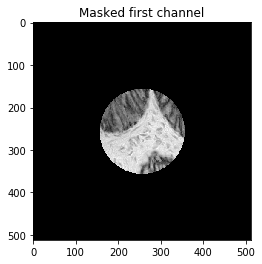

In [15]:
plt.gca().set_title('Masked first channel')
plt.imshow(image_hist[:,:,2]*circ1, cmap=plt.cm.gray)


### What happens if we invert the mask?

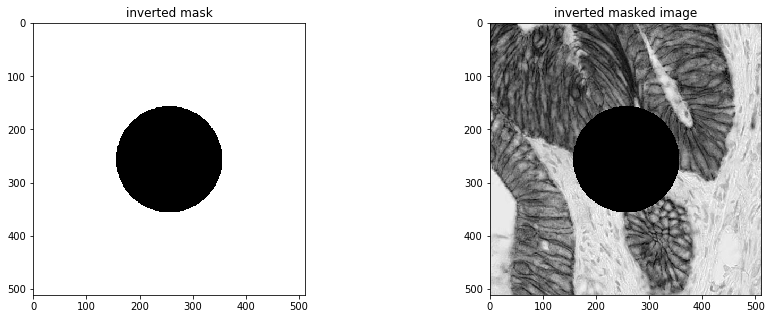

In [16]:
inverted_mask = invert(circ1)

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.gca().set_title('inverted mask')
plt.imshow(inverted_mask, cmap=plt.cm.gray)
plt.subplot(122)
plt.gca().set_title('inverted masked image')
plt.imshow(image_hist[:,:,2]*inverted_mask, cmap=plt.cm.gray)




**Just for closure, let's see what happens when we look at the full RGB image and try to apply the mask**

In [17]:
image = data.immunohistochemistry()
plt.imshow(image*circ1, cmap=plt.cm.gray)

ValueError: operands could not be broadcast together with shapes (512,512,3) (512,512) 

**Whoops. Seems like something is wrong. Our problem is that numpy didn't know how to multiply a 512x512x3 with a 512x512 mask. Numpy makes solving this very easy by adding a singleton dimension (look up broadcasting in your spare time).**

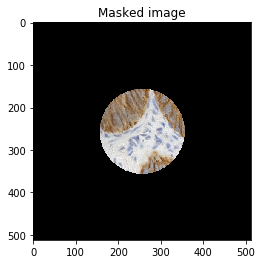

In [18]:
image = data.immunohistochemistry()
plt.gca().set_title('Masked image')
plt.imshow(image*np.expand_dims(circ1,2), cmap=plt.cm.gray)


## 1.4 Thresholding
## 1.4.1 Simple thresholding
### Thresholding an image is the process of setting an intensity (or intensities) for separating the different components of an image.

<img src="./images/Thresholding.png" width="600" height="600" >


#### In simplest case, the foreground and background have very different intensities. In that case thresholding is just clustering pixels by their intensity levels. 


The number of dimensions of the image is:  2
The size of the image is:  (512, 512)


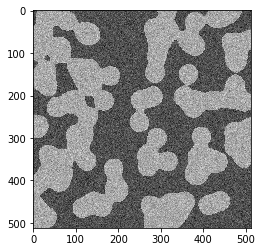

In [19]:
#this function from skimage converts images of integer types into floats, which are easier to work with.
import matplotlib.pyplot as plt
import numpy as np
from skimage import img_as_float
from skimage import data

# First, let's create a noisy image of blobs
image_blobs = img_as_float(data.binary_blobs(length=512, seed=1))
sigma = 0.22
image_blobs += np.random.normal(loc=0, scale=sigma, size=image_blobs.shape)

print("The number of dimensions of the image is: ", image_blobs.ndim)
print("The size of the image is: ", image_blobs.shape)
plt.imshow(image_blobs, cmap=plt.cm.gray)

### To find the right threshold, let's examine a histogram of pixel intensity values

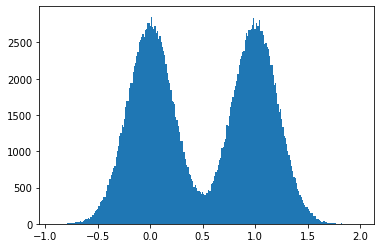

In [20]:
plt.hist(image_blobs.flatten(),bins=250)
plt.show()

Pick an appropriate threshold, by eye, and see if you can remove the background. 
What happens when you increase or decrease the threshold?

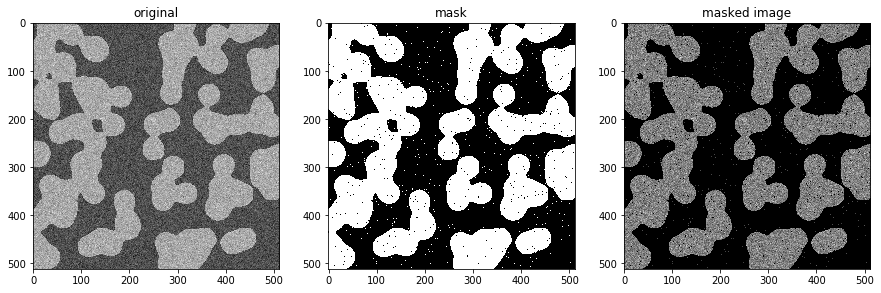

In [21]:
thresh = 0.5

mask = image_blobs>thresh
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.gca().set_title('original')
plt.imshow(image_blobs, interpolation='nearest', cmap=plt.cm.gray)
plt.subplot(132)
plt.gca().set_title('mask')
plt.imshow(mask, interpolation='nearest', cmap=plt.cm.gray)
plt.subplot(133)
plt.gca().set_title('masked image')
plt.imshow(image_blobs*mask, interpolation='nearest', cmap=plt.cm.gray)

### Our mask looks ok, but it has a lot of salt & pepper speckle noise. Why is that?
We can try and use what we learned before about filtering to clean up our results. What filter should we use?

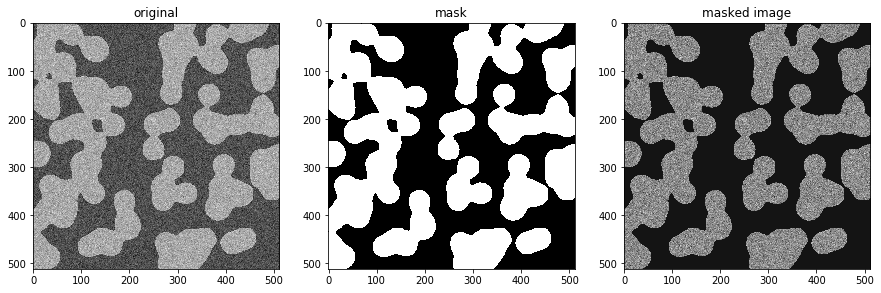

In [22]:
from skimage import filters

thresh = 0.5

mask = filters.gaussian(image_blobs, sigma=1)>thresh

plt.figure(figsize=(15,5))
plt.subplot(131)
plt.gca().set_title('original')
plt.imshow(image_blobs, interpolation='nearest', cmap=plt.cm.gray)
plt.subplot(132)
plt.gca().set_title('mask')
plt.imshow(mask, interpolation='nearest', cmap=plt.cm.gray)
plt.subplot(133)
plt.gca().set_title('masked image')
plt.imshow(image_blobs*mask, interpolation='nearest', cmap=plt.cm.gray)

It's usually a good idea before creating a mask to despeckle an image using a narrow gaussian filter!

## 1.4.2 Morphological operations
Morphology is a broad set of image processing operations that process images based on shapes. In a morphological operation, each pixel in the image is adjusted based on the value of other pixels in its neighborhood. By choosing the size and shape of the neighborhood, you can construct a morphological operation that is sensitive to specific shapes in the input image. (explanation from Mathworks)

Morphological operations are based around a *structuring element*, which is a small binary image, often of a disk or a square. The structuring element is positioned at all possible locations in the image and it is compared with the corresponding neighbourhood of pixels. Some operations test whether the element "fits" within the neighbourhood, while others test whether it "hits" or intersects the neighbourhood.

Common operations for image processing

Erosion - output image =1 wherever the structuring element **fits** (erodes the mask)

Dilation - output image =1 wherever the structuring element **hits** (expands the mask)

Opening - Erosion followed by dilation (opens gaps in spots where the mask is weakly connected)

Closing - Dilation followed by erosion (closes holes in the mask)


A very thorough explanation of morphological operationscould be found [here](https://www.cs.auckland.ac.nz/courses/compsci773s1c/lectures/ImageProcessing-html/topic4.htm)

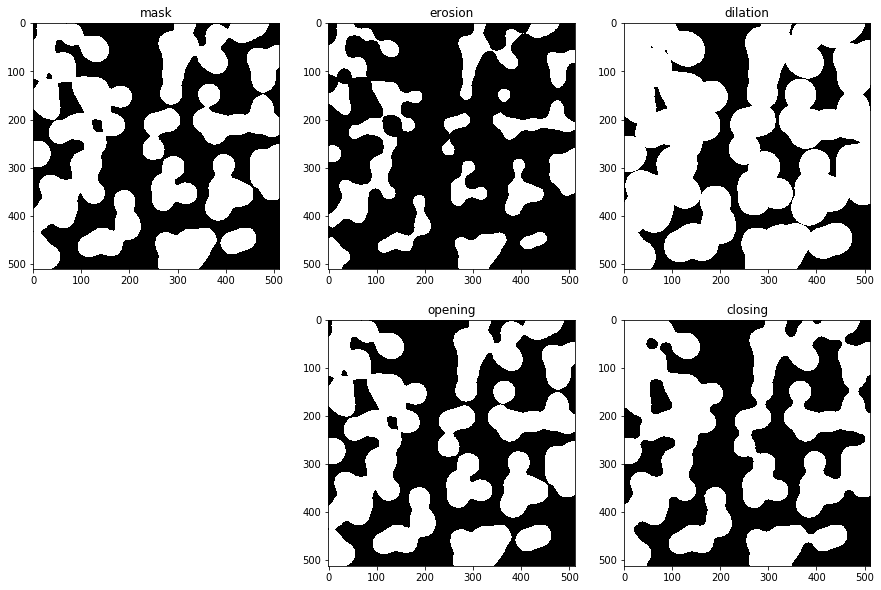

In [23]:
from skimage.morphology import erosion, dilation, opening, closing
from skimage.morphology import disk

#define a "disk" structuring element
selem = disk(10)

erosion_mask = erosion(mask, selem)
dilation_mask = dilation(mask, selem)
opening_mask = opening(mask, selem)
closing_mask = closing(mask, selem)

plt.figure(figsize=(15,10))
plt.subplot(231)
plt.gca().set_title('mask')
plt.imshow(mask, interpolation='nearest', cmap=plt.cm.gray)
plt.subplot(232)
plt.gca().set_title('erosion')
plt.imshow(erosion_mask, interpolation='nearest', cmap=plt.cm.gray)
plt.subplot(233)
plt.gca().set_title('dilation')
plt.imshow(dilation_mask, interpolation='nearest', cmap=plt.cm.gray)
plt.subplot(235)
plt.gca().set_title('opening')
plt.imshow(opening_mask, interpolation='nearest', cmap=plt.cm.gray)
plt.subplot(236)
plt.gca().set_title('closing')
plt.imshow(closing_mask, interpolation='nearest', cmap=plt.cm.gray)


## 1.4.3 Masking actual data

### We'll repeat the thresholding procedure using an actual microscopy image of fluorescent nuclei 

The number of dimensions of the image is:  2
The size of the image is:  (940, 1392)


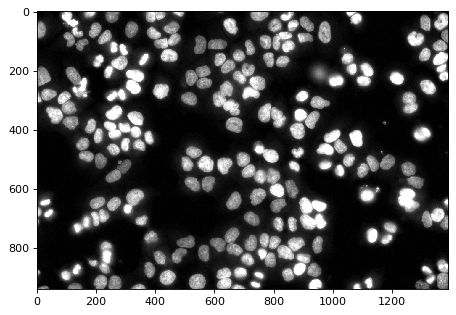

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import img_as_float
import matplotlib.image as mpimg

#this is how we load an image from the hard drive
image_nuclei = img_as_float(mpimg.imread("../Data/xy040-1.png"))


fig = plt.figure(num=None, figsize=(7.1, 4.6), dpi=80, facecolor='w', edgecolor='k')
print("The number of dimensions of the image is: ", image_nuclei.ndim)
print("The size of the image is: ", image_nuclei.shape)
plt.imshow(image_nuclei, cmap=plt.cm.gray, vmin=0, vmax=0.01)

### Again, let's plot a histogram of intensity values

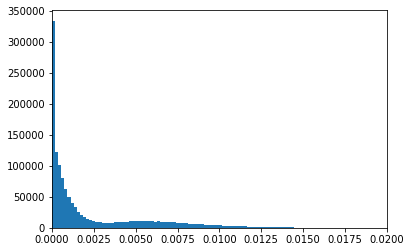

In [25]:
plt.hist(image_nuclei.flatten(),bins=250)
plt.xlim((0, 0.02))
plt.show()


### And again we'll pick a value by eye:

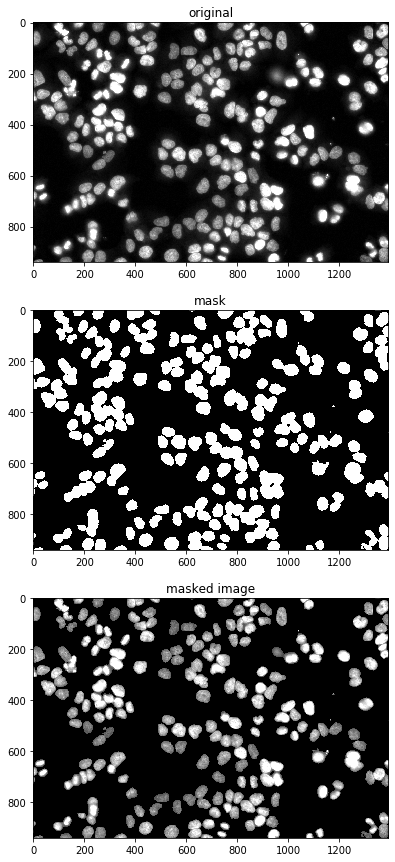

In [26]:
thresh = 0.003

#remember to despeckle before creating a mask!
mask = filters.gaussian(image_nuclei, sigma=1)>thresh
plt.figure(figsize=(8,15))
plt.subplot(311)
plt.gca().set_title('original')
plt.imshow(image_nuclei, interpolation='nearest', cmap=plt.cm.gray, vmin=0, vmax=0.01)
plt.subplot(312)
plt.gca().set_title('mask')
plt.imshow(mask, interpolation='nearest', cmap=plt.cm.gray)
plt.subplot(313)
plt.gca().set_title('masked image')
plt.imshow(image_nuclei*mask, interpolation='nearest', cmap=plt.cm.gray, vmin=0, vmax=0.01)

### Not bad! But also not very scalable. If we have 100s of images we can't look at them one-by-one and find thresholds by eye. Next, we'll look at some methods for automatically finding the thresholds.

## 1.5 Automated threshold calculation

### There is a very large list of algorithms for threshold calculation out there that are optimized for different situations. We will briefly review a few of the most common ones.

### 1.5.1 Iterative mean thresholding
Algorithm:
1. Start with some threshold $T_i$
2. Compute the means $m_0$ and $m_1$ of the BG and FG
3. Update $T_{i+1} = \frac{m_0+m_1}{2}$
4. Repeat until it converges

<img src="./images/meanThresh.gif" width="400" height="400" >

### 1.5.2 Otsu thresholding
The algorithm exhaustively searches for the threshold that minimizes the intra-class variance, defined for a given threshold $T$ as a weighted sum of variances of the two classes:
$\sigma^2_w(T)=\omega_0(T)\sigma^2_0(T)+\omega_1(T)\sigma^2_1(T)$

For 2 classes, minimizing the intra-class variance is equivalent to maximizing inter-class variance, which is much easier to calculate:
\begin{align}
\sigma^2_b(T) & =\sigma^2-\sigma^2_w(T)=\omega_0(\mu_0-\mu_T)^2+\omega_1(\mu_1-\mu_T)^2 \\
& =\omega_0(T) \omega_1(T) \left[\mu_0(T)-\mu_1(T)\right]^2
\end{align}

<img src="./images/Otsu's_Method_Visualization.gif" width="400" height="400" >

### 1.5.3 Triangle thresholding
Algorithm:
1. Draw a straight line between the histogram peak and the brightest value.
2. From every point on that line, draw the shortest connecting line to the histogram.
3. Find longest of these connecting lines.
4. Threshold is set at the intersection of that line and the curve.
<img src="./images/triThresh.png" width="400" height="400" >

*note: Triangle thresholding is good for situations where the image is mostly background, and there is no clear "peak" of bright pixels.*


### [scikit-image's filters module](https://scikit-image.org/docs/dev/api/skimage.filters.html) implements a large variety of thresholding algorithms. Let's apply the ones we just learned about.


In [27]:
from skimage import filters

meanThresh = filters.threshold_mean(image_nuclei)
print(meanThresh)

OtsuThresh = filters.threshold_otsu(image_nuclei)
print(OtsuThresh)

TriThresh = filters.threshold_triangle(image_nuclei)
print(TriThresh)


0.0023766113
0.0040662913
0.0022590505


### Let's look at the resulting masks we get with each of these thresholds

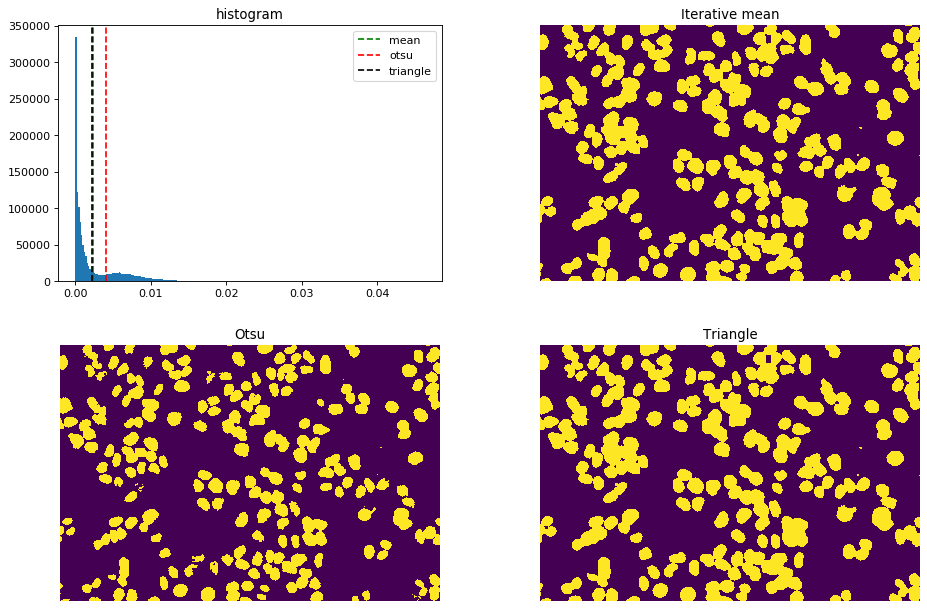

In [28]:
fig = plt.figure(num=None, figsize=(12, 8), dpi=80)
ax1 = fig.add_axes([0.1,0.6,0.4,0.4])

ax1.hist(image_nuclei.flatten(),bins=250)

ax1.axvline(meanThresh, color='g', linestyle='--')
ax1.axvline(OtsuThresh, color='r', linestyle='--')
ax1.axvline(TriThresh, color='k', linestyle='--')

ax1.legend(['mean' ,'otsu', 'triangle'])
ax1.set_title('histogram')

ax2 = fig.add_axes([0.6,0.6,0.4,0.4])
mask_mean = filters.gaussian(image_nuclei, sigma=1)>meanThresh

ax2.imshow(mask_mean)
ax2.set_title('Iterative mean')
ax2.set_axis_off()

ax2 = fig.add_axes([0.1,0.1,0.4,0.4])
mask_otsu = filters.gaussian(image_nuclei, sigma=1)>OtsuThresh

ax2.imshow(mask_otsu)
ax2.set_title('Otsu')
ax2.set_axis_off()

ax2 = fig.add_axes([0.6,0.1,0.4,0.4])
mask_tri = filters.gaussian(image_nuclei, sigma=1)>TriThresh

ax2.imshow(mask_tri)
ax2.set_title('Triangle')
ax2.set_axis_off()


### 1.5.4 Local thresholding
#### All of the methods we saw so far are *global* in the sense that the same threshold is applied to the whole picture. Sometimes we can have an image with vastly different intensity distributions at different locations. Using local thresholding, we can overcome such cases.

Let's compare the results from a global (Otsu) and a local threshold. 

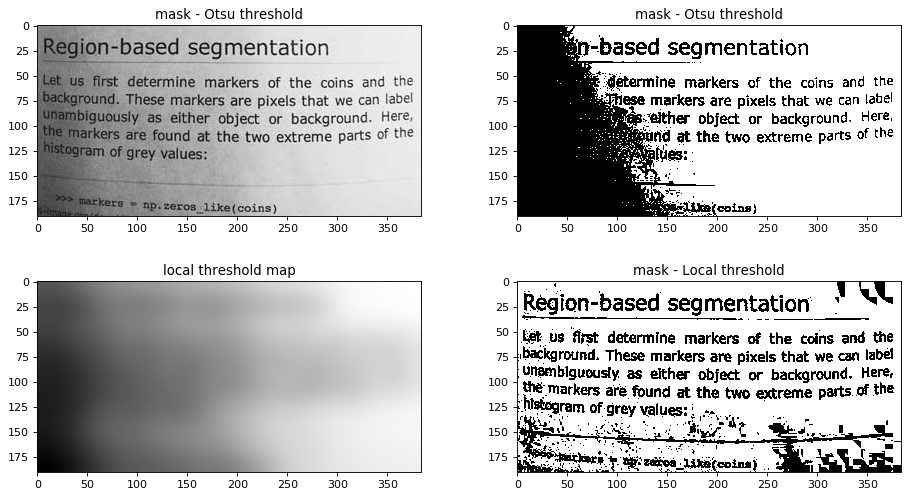

In [29]:
from skimage import data

image = data.page()
fig = plt.figure(num=None, figsize=(12, 8), dpi=80)

#global thresholding
threshGlobal = filters.threshold_otsu(image)

ax1 = fig.add_axes([0.1,0.6,0.4,0.4])
ax1.set_title('mask - Otsu threshold')
plt.imshow(image ,cmap='gray')

ax2 = fig.add_axes([0.6,0.6,0.4,0.4])
ax2.set_title('mask - Otsu threshold')
plt.imshow(image>threshGlobal,cmap='gray')

#local thresholding

#Try and change this number and see what happens
block_size  = 81

threshLocal = filters.threshold_local(image, block_size)

ax1 = fig.add_axes([0.1,0.2,0.4,0.4])
ax1.imshow(threshLocal,cmap='gray')
ax1.set_title('local threshold map')


ax2 = fig.add_axes([0.6,0.2,0.4,0.4])
ax2.set_title('mask - Local threshold')
plt.imshow(image>threshLocal,cmap='gray')


# 2. Image segmentation
### Image segmentation is the process of partitioning a digital image into multiple segments. The goal of segmentation is to simplify and/or change the representation of an image into something that is more meaningful and easier to analyze.
<img src="./images/imageSegmentation.png" width="400" height="400" >

## 2.1 Connected components
### After we generate a mask, the simplest segmentation involves simply looking for regions in the mask that are connected and labeling each one as a separate object. 

#### We begin by generating a simple mask using the triangle threshold method:

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import img_as_float
import matplotlib.image as mpimg
from skimage import filters

image_nuclei = img_as_float(mpimg.imread("../Data/xy040-1.png"))
TriThresh = filters.threshold_triangle(image_nuclei)
#despeckle
mask = filters.gaussian(image_nuclei, sigma=1)>TriThresh

### [scikit-image's measure module](https://scikit-image.org/docs/dev/api/skimage.measure.html) implements a  variety of useful methods for segmentation. the *label* function returns a *labeled image* of connected components (CCs). Each CC is uniquely numbered by an integer.

$\begin{bmatrix} 
1 & 1 & 0 & 0 & 2\\
1 & 1 & 0 & 2 & 2\\
0 & 0 & 0 & 0 & 0\\
0 & 3 & 0 & 4 & 4\\
0 & 0 & 0 & 4 & 4\\
\end{bmatrix}$


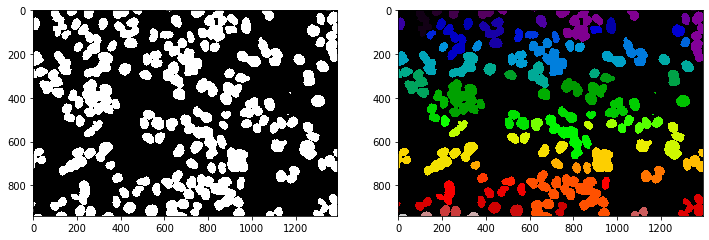

In [31]:
from skimage import measure
labels = measure.label(mask)

plt.figure(figsize=(12,5))

plt.subplot(121)
plt.imshow(mask, cmap='gray')
plt.subplot(122)
plt.imshow(labels, cmap='nipy_spectral')

#### We can easily generate a *mask* for a **specific** CC using the binary operation *labels==i*

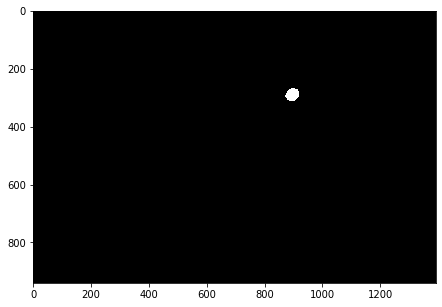

In [32]:
i=43
mask_of_CC_i = labels==i

plt.figure(figsize=(10,5))
plt.imshow(mask_of_CC_i, cmap='gray')

## Problem with simple CC segmentation : overlapping objects

### We often really care about having only a single object per label. Using CC, any overlapping objects will merge into one blob:

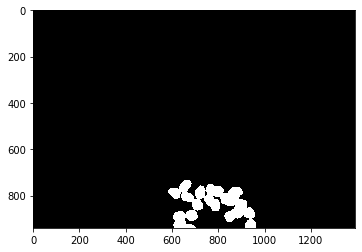

In [33]:
i=87
mask_of_CC_i = labels==i
plt.imshow(mask_of_CC_i, cmap='gray')

### These problems can be partially resolved using morphological operations, but there's no silver bullet

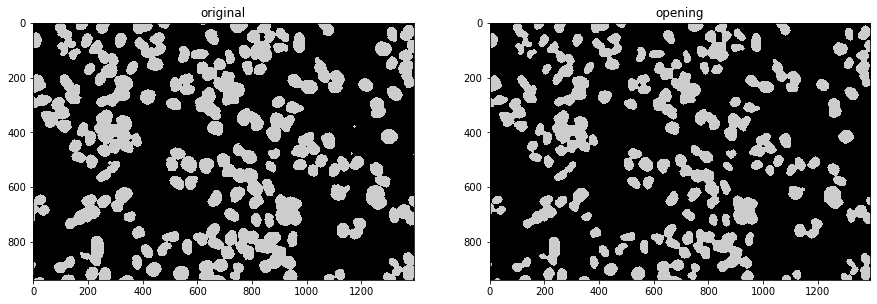

In [34]:
from skimage.morphology import erosion, dilation, opening, closing
from skimage.morphology import disk

#define a "disk" structuring element
selem1 = disk(10)
selem2 = disk(7)

plt.figure(figsize=(15,10))
plt.subplot(121)
plt.gca().set_title('original')
plt.imshow(mask, cmap='nipy_spectral')
plt.subplot(122)
plt.gca().set_title('opening')
plt.imshow(dilation(erosion(mask, selem1),selem2), interpolation='nearest', cmap='nipy_spectral')


## 2.2 Watershed based segmentation

### 2.2.1 The watershed algorithm
 The watershed transformation treats the image it operates upon like a topographic map, with the brightness of each point representing its height, and finds the lines that run along the tops of ridges.

<img src="./images/Diagram-of-watershed-algorithm.png" width="400" height="400" >

More precisely, the algorithm goes as follows:
1. *Label* local minima (i.e. $S_1$, $S_2$)
2. Move to next higher intensity level
3. Assign to each point the label of it's closest label set.
**<font color='red'>Points equidistant to multiple sets are labeled as boundaries and intensities set to 0</font>**
4. Repeat until all points are labeled

<img src="./images/watershed1.png" width="400" height="400" >

Let's start with a very naive application. We will invert the image, and then simply apply the *watershed* function from the [scikit-image morphology module](https://scikit-image.org/docs/dev/api/skimage.morphology). The function returns a labeled image.

<Figure size 1080x720 with 0 Axes>

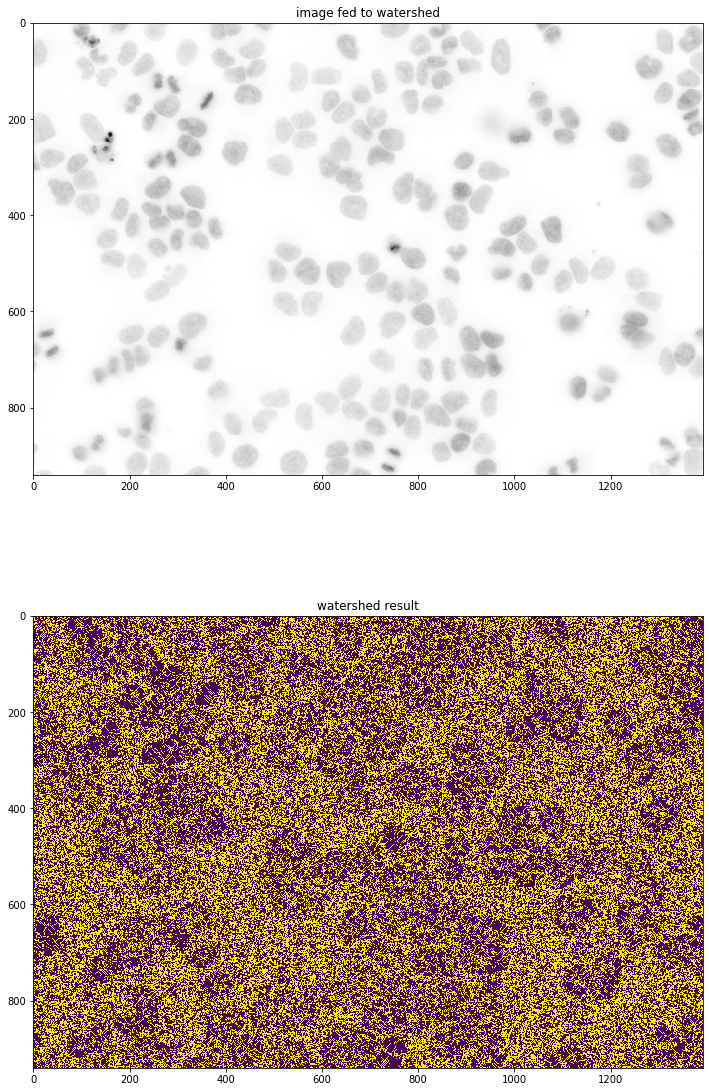

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import img_as_float
import matplotlib.image as mpimg
from skimage import filters

from skimage.util import invert
from skimage.morphology import watershed


image_nuclei = img_as_float(mpimg.imread("../Data/xy040-1.png"))


#invert image
image_to_watershed = invert(image_nuclei)

#Calculate watershed transform
labels_naive = watershed(image_to_watershed, watershed_line = 1)
plt.figure(figsize=(15,10))

#let's look at all the boundaries
plt.figure(figsize=(12,20))
plt.subplot(211)
plt.gca().set_title('image fed to watershed')
plt.imshow(image_to_watershed, cmap='gray')
plt.subplot(212)
plt.gca().set_title('watershed result')
plt.imshow(labels_naive==0, cmap='viridis')

### So this clearly didn't work. Why? How do we fix it?

Noise generates a ton of local minima. Each gets its own basin. This leads to massive oversegmentation.

#### Watershed segmentation is only a *part* of a segmentation pipeline. Preprocessing (denoising, smoothing, seeding minima) of the image is CRUCIAL for it to work well. 

<img src="./images/PreprocessingApproaches.png" width="600" height="400" >

The first thing we'll do is to apply the mask that we found before. This is simply done by adding a *mask* argument to the watershed function.

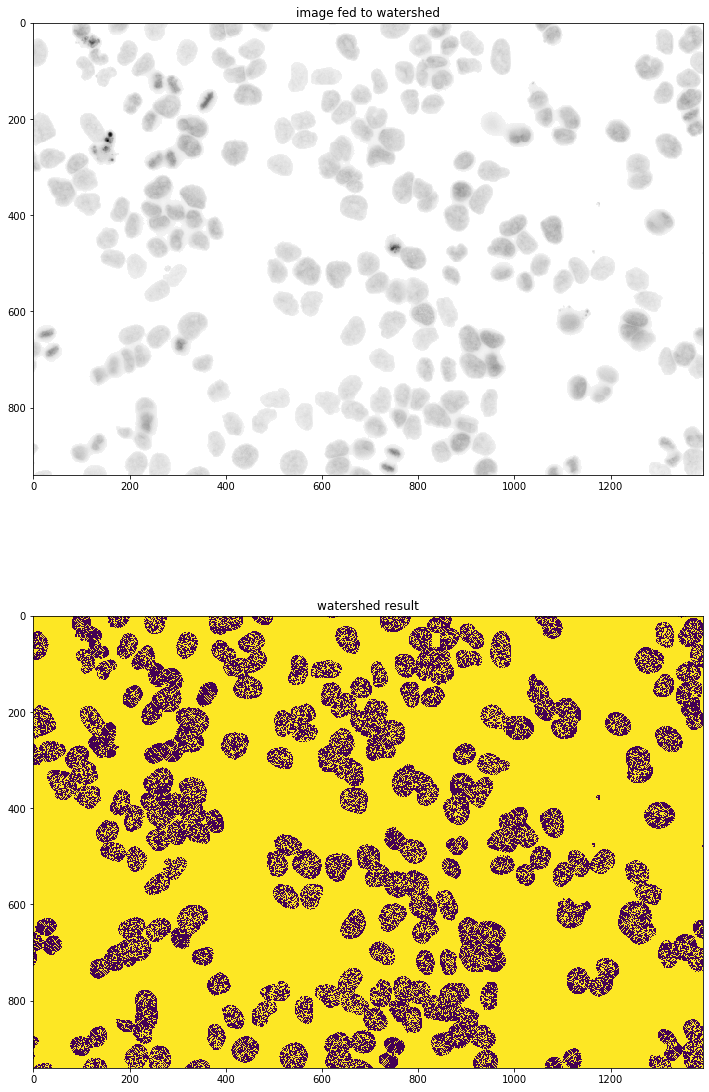

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import img_as_float
import matplotlib.image as mpimg
from skimage import filters

from skimage.util import invert
from skimage.morphology import watershed

image_nuclei = img_as_float(mpimg.imread("../Data/xy040-1.png"))

mask = filters.gaussian(image_nuclei, sigma=1)>TriThresh

#mask and invert image
image_to_watershed = image_nuclei*mask
image_to_watershed = invert(image_to_watershed)

#Calculate watershed transform
#pass the mask to the watershed function so it avoids segmenting the BG
labels_masked = watershed(image_to_watershed, watershed_line = 1, mask=mask)

#let's look at all the boundaries
plt.figure(figsize=(12,20))
plt.subplot(211)
plt.gca().set_title('image fed to watershed')
plt.imshow(image_to_watershed, cmap='gray')
plt.subplot(212)
plt.gca().set_title('watershed result')
plt.imshow(labels_masked==0, cmap='viridis')

#### So we got rid of all the BG regions, but we are still oversegmenting. Why?

Let's try to smoothen the image and get rid of the many local minima. How wide should the gaussian kernel be?

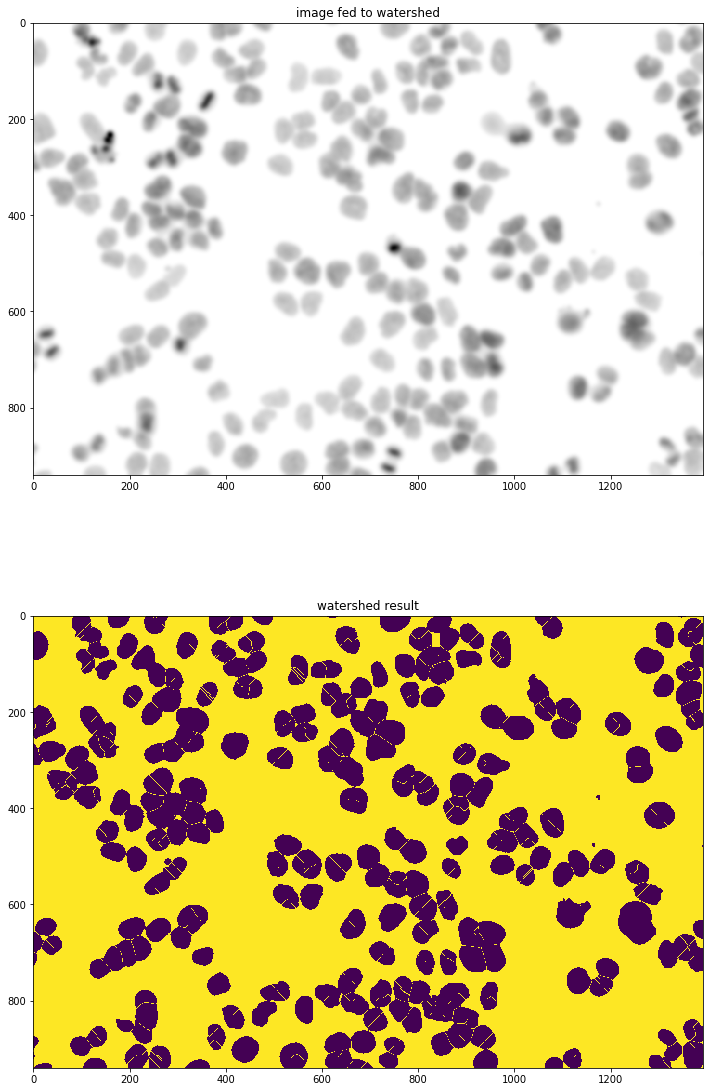

In [47]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import img_as_float
import matplotlib.image as mpimg
from skimage import filters

from skimage.util import invert
from skimage.morphology import watershed

image_nuclei = img_as_float(mpimg.imread("../Data/xy040-1.png"))

mask = filters.gaussian(image_nuclei, sigma=1)>TriThresh

#mask, smooth, and invert the image
sigma_for_smoothing = 4
image_to_watershed = image_nuclei*mask
image_to_watershed = filters.gaussian(image_to_watershed, sigma=sigma_for_smoothing)
image_to_watershed = invert(image_to_watershed)

#Calculate watershed transform
#pass the mask to the watershed function so it avoids segmenting the BG
labels_masked_smooth = watershed(image_to_watershed, watershed_line = 1, mask=mask)

#let's look at all the boundaries
plt.figure(figsize=(12,20))
plt.subplot(211)
plt.gca().set_title('image fed to watershed')
plt.imshow(image_to_watershed, cmap='gray')
plt.subplot(212)
plt.gca().set_title('watershed result')
plt.imshow(labels_masked_smooth==0, cmap='viridis')

### We're starting to get somewhere!! Can we do better?

#### We can do more to help the algorithm by providing local markers (seeds) from which to start the process

#### We will find seeds by calculating local maxima, and then merge seeds that are less than 5 pixels apart using morphological dilation

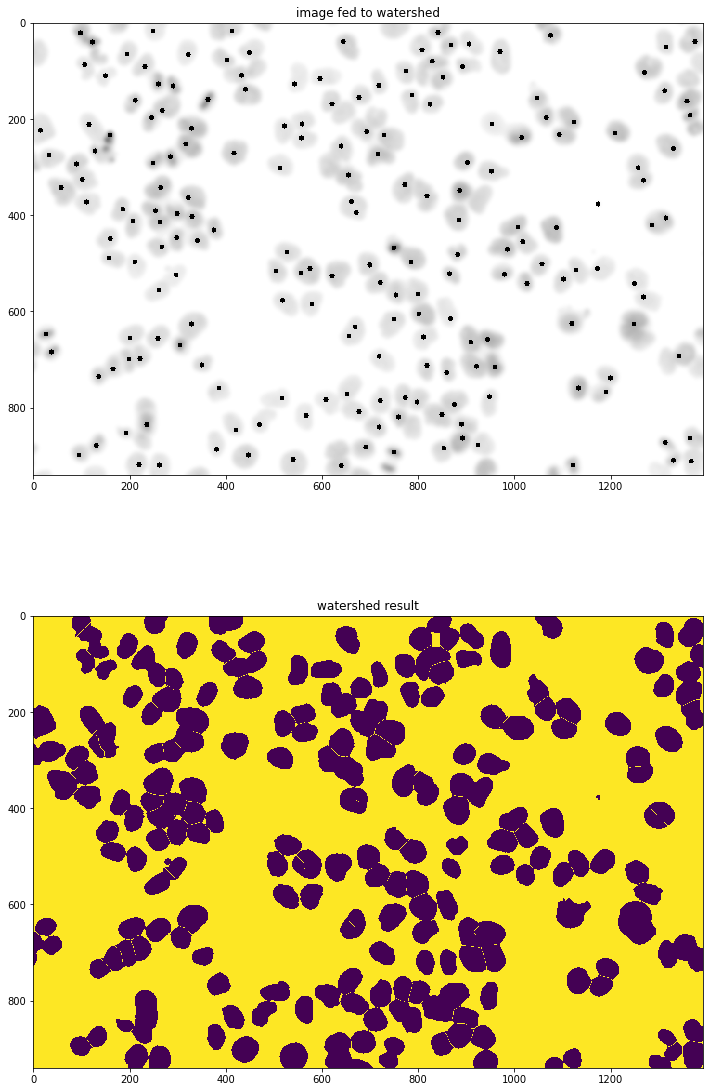

In [46]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import img_as_float
import matplotlib.image as mpimg
from skimage import filters
from skimage import measure

from skimage.util import invert
from skimage.morphology import watershed

from skimage.feature import peak_local_max

image_nuclei = img_as_float(mpimg.imread("../Data/xy040-1.png"))


mask = filters.gaussian(image_nuclei, sigma=1)>TriThresh


#mask, smooth, and invert the image
sigma_for_smoothing = 4
image_to_watershed = image_nuclei*mask
image_to_watershed = filters.gaussian(image_to_watershed, sigma=sigma_for_smoothing)
image_to_watershed = invert(image_to_watershed)

#find local peaks to use as seeds
MaskedImagePeaks = peak_local_max(-image_to_watershed, footprint=np.ones((30, 30)), threshold_abs=None, threshold_rel=None, exclude_border=True, indices=False).astype('int')

#create disk structuring element of radius 5
selem = disk(5)
#dilate local peaks so that close ones merge
peakMask = dilation(MaskedImagePeaks,selem)
# label local peak regions to find initial markers
markers = measure.label(peakMask)


#pass the *markers* argument to the watershed function
labels_localmax_markers = watershed(image_to_watershed,markers, watershed_line = 1, mask=mask)

#let's look at all the boundaries
plt.figure(figsize=(12,20))
plt.subplot(211)
plt.gca().set_title('image fed to watershed')
plt.imshow(image_to_watershed-peakMask, cmap='gray')
plt.clim((0.95, 1))
plt.subplot(212)
plt.gca().set_title('watershed result')
plt.imshow(labels_localmax_markers==0, cmap='viridis')




#### This is pretty good! We're still getting a few errors here and there, but there's no big systematic over- or under- segmentation. This is a typical good result when dealing with real data. 

# 3. Feature extraction
### Feature extraction is a process of dimensionality reduction by which an initial raw image is reduced to a list of objects and attributes

<img src="./images/feat_ext.png" width="600" height="400" >

## 3.1 Extracting region properties

### [scikit-image's measure module](https://scikit-image.org/docs/dev/api/skimage.measure.html)  implements a  method called *regionprops* that accepts a labeled mask of connected components, and, optionally, a corresponding image, and returns a list.  Each object on the list contains useful data about the size, shape, position, and intensity ([see the full list here](https://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.regionprops)) of a specific component. 

The length of the list is equal to the total number of objects detected. 


#### We'll start by extracting the number of CC we found and the area of each CC

198


(array([ 6., 18., 29., 38., 36., 35., 13., 13.,  8.,  2.]),
 array([0.00359407, 0.00422991, 0.00486576, 0.0055016 , 0.00613744,
        0.00677328, 0.00740913, 0.00804497, 0.00868081, 0.00931665,
        0.0099525 ], dtype=float32),
 <a list of 10 Patch objects>)

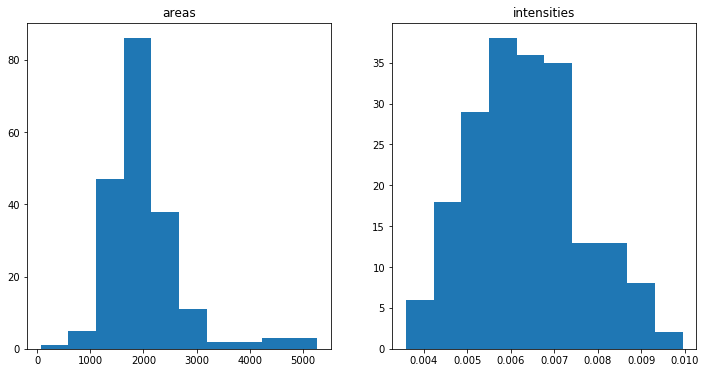

In [53]:
from skimage import measure

#We use regionprops 
props = measure.regionprops(labels_localmax_markers,image_nuclei)
#how many total connected components did we get?
print(len(props))

areas = [r.area for r in props]
intensities = [r.mean_intensity for r in props]

#let's look at all the boundaries
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.gca().set_title('areas')
plt.hist(areas)
plt.subplot(122)
plt.gca().set_title('intensities')
plt.hist(intensities)



#### Let's define some useful functions for converting a list of props into a pandas dataframe. These should become obsolete soon since the new version of scikit-image will have this functionality 

In [40]:
import pandas as pd

def scalar_attributes_list(im_props):
    """
    Makes list of all scalar, non-dunder, non-hidden
    attributes of skimage.measure.regionprops object
    """
    
    attributes_list = []
    
    for i, test_attribute in enumerate(dir(im_props[0])):
        
        #Attribute should not start with _ and cannot return an array
        #does not yet return tuples
        if test_attribute[:1] != '_' and not\
                isinstance(getattr(im_props[0], test_attribute), np.ndarray):                
            attributes_list += [test_attribute]
            
    return attributes_list


def regionprops_to_df(im_props):
    """
    Read content of all attributes for every item in a list
    output by skimage.measure.regionprops
    """

    attributes_list = scalar_attributes_list(im_props)

    # Initialise list of lists for parsed data
    parsed_data = []

    # Put data from im_props into list of lists
    for i, _ in enumerate(im_props):
        parsed_data += [[]]
        
        for j in range(len(attributes_list)):
            parsed_data[i] += [getattr(im_props[i], attributes_list[j])]

    # Return as a Pandas DataFrame
    return pd.DataFrame(parsed_data, columns=attributes_list)

### Now, to get all the properties in table/dataframe form we simply run:

In [59]:
props_df = regionprops_to_df(props)
props_df

area                    bbox  bbox_area  \
0    1571       (0, 231, 40, 281)       2000   
1    2381       (0, 365, 41, 437)       2952   
2    1499       (0, 816, 39, 870)       2106   
3    1124        (0, 80, 45, 121)       1845   
4    1997     (0, 1043, 49, 1101)       2842   
..    ...                     ...        ...   
193  2072  (885, 1349, 940, 1392)       2365   
194  1889    (891, 190, 940, 240)       2450   
195  1831    (893, 240, 940, 286)       2162   
196  1990  (899, 1063, 940, 1140)       3157   
197  4249    (866, 605, 940, 706)       7474   

                                    centroid  convex_area  eccentricity  \
0    (17.156588160407384, 253.7644812221515)         1609      0.531654   
1    (16.799244015119697, 398.1894162116758)         2447      0.847843   
2     (17.24482988659106, 843.3535690460307)         1574      0.758806   
3     (16.209074733096084, 97.7161921708185)         1187      0.628163   
4    (21.534802203304956, 1073.849774661993)         2129      0.720334   
..                                       ...          ...           ...   
193   (912.226833976834, 1371.2958494208494)         2111      0.646154   
194               (916.0, 214.8644785600847)         1942      0.486755   
195     (918.210813762971, 262.800109229929)         1862      0.303558   
196  (923.2276381909547, 1106.7361809045226)         2319      0.905365   
197    (908.822546481525, 640.7867733584372)         5146      0.726801   

     equivalent_diameter  euler_number    extent  filled_area  ...  \
0              44.724259             1  0.785500         1571  ...   
1              55.059816             1  0.806572         2381  ...   
2              43.687367             1  0.711776         1499  ...   
3              37.830163             1  0.609214         1124  ...   
4              50.424789             1  0.702674         1997  ...   
..                   ...           ...       ...          ...  ...   
193            51.362947             1  0.876110         2072  ...   
194            49.042324             1  0.771020         1889  ...   
195            48.283554             1  0.846901         1831  ...   
196            50.336336             1  0.630345         1990  ...   
197            73.552667             1  0.568504         4249  ...   

    major_axis_length  max_intensity mean_intensity  min_intensity  \
0           49.623666       0.007462       0.004448       0.002106   
1           77.454504       0.011612       0.006725       0.001938   
2           54.431098       0.013687       0.006703       0.002014   
3           44.560671       0.017350       0.009059       0.002045   
4           62.102149       0.014206       0.008100       0.001862   
..                ...            ...            ...            ...   
193         59.302066       0.009445       0.005288       0.001938   
194         52.603354       0.008515       0.005553       0.001923   
195         49.978873       0.006973       0.004818       0.001953   
196         86.117327       0.015244       0.006896       0.001984   
197         99.780077       0.011398       0.006887       0.001938   

     minor_axis_length  orientation   perimeter  \
0            42.029339     0.302637  155.497475   
1            41.070074     0.122899  202.325902   
2            35.451855     0.394872  155.539105   
3            34.671859     0.853607  139.438600   
4            43.075765    -0.722874  182.124892   
..                 ...          ...         ...   
193          45.259769    -1.501113  172.669048   
194          45.951068     0.971594  164.953319   
195          47.620513     1.121577  162.083261   
196          36.568295     0.233664  231.681241   
197          68.533750    -0.743456  326.929978   

                                                slice  solidity  \
0         (slice(0, 40, None), slice(231, 281, None))  0.976383   
1         (slice(0, 41, None), slice(365, 437, None))  0.973028   
2         (slice(0, 39, None), 

### Finally, if we imaged our cells in multiple channels, we would want use the same segmented nuclei and measure intensities of other channels.

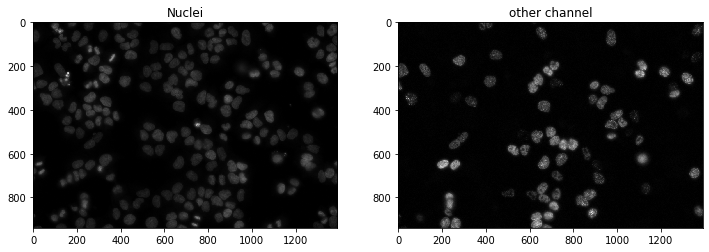

In [60]:
from skimage import measure
from skimage import img_as_float
import matplotlib.image as mpimg

#load another channel
image_2ndChannel = img_as_float(mpimg.imread("../Data/xy040-2.png"))

# extract regionprops using labels_localmax_markers mask from image_2ndChannel
props_other_channel = measure.regionprops(labels_localmax_markers,image_2ndChannel)


plt.figure(figsize=(12,6))
plt.subplot(121)
plt.gca().set_title('Nuclei')
plt.imshow(image_nuclei, cmap='gray')
plt.subplot(122)
plt.gca().set_title('other channel')
plt.imshow(image_2ndChannel, cmap='gray')

### Extract only the intensity related features (others* are features of the mask only)

(array([129.,   8.,  10.,   7.,  14.,  10.,  11.,   7.,   1.,   1.]),
 array([7.6892567e-05, 7.3770597e-04, 1.3985194e-03, 2.0593328e-03,
        2.7201462e-03, 3.3809596e-03, 4.0417728e-03, 4.7025862e-03,
        5.3633996e-03, 6.0242130e-03, 6.6850265e-03], dtype=float32),
 <a list of 10 Patch objects>)

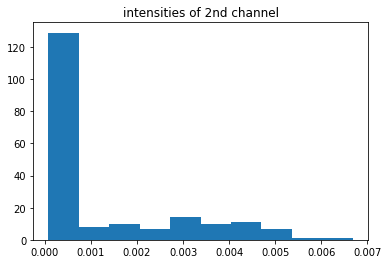

In [61]:
mean_2nd_channel = [r.mean_intensity for r in props_other_channel]
max_2nd_channel = [r.max_intensity for r in props_other_channel]
min_2nd_channel = [r.min_intensity for r in props_other_channel]

plt.gca().set_title('intensities of 2nd channel')
plt.hist(mean_2nd_channel)


### Add these new features to the pandas dataframe

In [62]:
props_df['mean_intensity_ch2'] = mean_2nd_channel
props_df['max_intensity_ch2'] = max_2nd_channel
props_df['min_intensity_ch2'] = min_2nd_channel

props_df

area                    bbox  bbox_area  \
0    1571       (0, 231, 40, 281)       2000   
1    2381       (0, 365, 41, 437)       2952   
2    1499       (0, 816, 39, 870)       2106   
3    1124        (0, 80, 45, 121)       1845   
4    1997     (0, 1043, 49, 1101)       2842   
..    ...                     ...        ...   
193  2072  (885, 1349, 940, 1392)       2365   
194  1889    (891, 190, 940, 240)       2450   
195  1831    (893, 240, 940, 286)       2162   
196  1990  (899, 1063, 940, 1140)       3157   
197  4249    (866, 605, 940, 706)       7474   

                                    centroid  convex_area  eccentricity  \
0    (17.156588160407384, 253.7644812221515)         1609      0.531654   
1    (16.799244015119697, 398.1894162116758)         2447      0.847843   
2     (17.24482988659106, 843.3535690460307)         1574      0.758806   
3     (16.209074733096084, 97.7161921708185)         1187      0.628163   
4    (21.534802203304956, 1073.849774661993)         2129      0.720334   
..                                       ...          ...           ...   
193   (912.226833976834, 1371.2958494208494)         2111      0.646154   
194               (916.0, 214.8644785600847)         1942      0.486755   
195     (918.210813762971, 262.800109229929)         1862      0.303558   
196  (923.2276381909547, 1106.7361809045226)         2319      0.905365   
197    (908.822546481525, 640.7867733584372)         5146      0.726801   

     equivalent_diameter  euler_number    extent  filled_area  ...  \
0              44.724259             1  0.785500         1571  ...   
1              55.059816             1  0.806572         2381  ...   
2              43.687367             1  0.711776         1499  ...   
3              37.830163             1  0.609214         1124  ...   
4              50.424789             1  0.702674         1997  ...   
..                   ...           ...       ...          ...  ...   
193            51.362947             1  0.876110         2072  ...   
194            49.042324             1  0.771020         1889  ...   
195            48.283554             1  0.846901         1831  ...   
196            50.336336             1  0.630345         1990  ...   
197            73.552667             1  0.568504         4249  ...   

    min_intensity  minor_axis_length orientation   perimeter  \
0        0.002106          42.029339    0.302637  155.497475   
1        0.001938          41.070074    0.122899  202.325902   
2        0.002014          35.451855    0.394872  155.539105   
3        0.002045          34.671859    0.853607  139.438600   
4        0.001862          43.075765   -0.722874  182.124892   
..            ...                ...         ...         ...   
193      0.001938          45.259769   -1.501113  172.669048   
194      0.001923          45.951068    0.971594  164.953319   
195      0.001953          47.620513    1.121577  162.083261   
196      0.001984          36.568295    0.233664  231.681241   
197      0.001938          68.533750   -0.743456  326.929978   

                                                slice  solidity  \
0         (slice(0, 40, None), slice(231, 281, None))  0.976383   
1         (slice(0, 41, None), slice(365, 437, None))  0.973028   
2         (slice(0, 39, None), slice(816, 870, None))  0.952351   
3          (slice(0, 45, None), slice(80, 121, None))  0.946925   
4       (slice(0, 49, None), slice(1043, 1101, None))  0.937999   
..                                                ...       ...   
193  (slice(885, 940, None), slice(1349, 1392, None))  0.981525   
194    (slice(891, 940, None), slice(190, 240, None))  0.972709   
195    (slice(893, 940, None), slice(240, 286, None))  0.983351   
196  (slice(899, 940, None), slice(1063, 1140, None))  0.858129   
197    (slice(866, 940, None), slice(605, 706, None))  0.825690   

                            weighted_centroid  mean_intensity_ch2  \
0     (16.40264351497449, 253.6091788193155

### And so, we've successfully implemented a simple image segmentation pipeline for multicolor microscopy data. 


#### Fin.



